In [ ]:
import pandas as pd
import numpy as np

#Creating dataframe

In [ ]:
#- with dictionary
#-Dictionary keys are columns names and dict value are values are values of respected columns


df = pd.DataFrame(
    {"Age":[21,24,32,36,45],
     "Sex":['F','M','M','F','F'],
     "BP":['High','Low','High','Low','Low'],
     "Na_to_K":[25.353,13.094,10.114,12.341,22.557],
     "Drug":['Drug_A','Drug_B','Drug_B','Drug_A','Drug_A']},index=[1,2,3,4,5]
    
)

In [ ]:
df

,Age,Sex,BP,Na_to_K,Drug
1,21,F,High,25.353,Drug_A
2,24,M,Low,13.094,Drug_B
3,32,M,High,10.114,Drug_B
4,36,F,Low,12.341,Drug_A
5,45,F,Low,22.557,Drug_A


In [ ]:
#-with list of list
#-specify the value of each row
df  = pd.DataFrame(
                    [[21,24,32,36,45],
                    ['F','M','M','F','F'],
                    ['High','Low','High','Low','Low'],
                    [25.353,13.094,10.114,12.341,22.557],
                    ['Drug_A','Drug_B','Drug_B','Drug_A','Drug_A']],
                   
                   
                    index=[1,2,3,4,5],
                    columns = ['Age', 'Sex', 'BP','Na_to_K','Drug'])

In [ ]:
df

,Age,Sex,BP,Na_to_K,Drug
1,21,24,32,36,45
2,F,M,M,F,F
3,High,Low,High,Low,Low
4,25.353,13.094,10.114,12.341,22.557
5,Drug_A,Drug_B,Drug_B,Drug_A,Drug_A


Tidy Data

In [ ]:

# In tidy data every column is an variable
# and very row is an observation.
# generally we deal with tidy data

dataframe_path = 'https://files.zillowstatic.com/research/public_csvs/med_doz_pending/Metro_med_doz_pending_uc_sfrcondo_month.csv'
df_scale = pd.read_csv(dataframe_path,low_memory=False)
df_scale.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,...,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31
0,102001,0,United States,country,NaN,42.0,25.0,22.0,19.0,20.0,...,12.0,15.0,11.0,8.0,7.0,6.0,7.0,9.0,13.0,16.0
1,394913,1,"New York, NY",msa,NY,65.0,39.0,35.0,35.0,34.0,...,38.0,40.0,47.0,26.0,21.0,20.0,20.0,23.0,29.0,31.0
2,753899,2,"Los Angeles, CA",msa,CA,21.0,14.0,16.0,15.0,16.0,...,13.0,14.0,12.0,10.0,10.0,10.0,12.0,14.0,18.0,23.0
3,394463,3,"Chicago, IL",msa,IL,50.0,23.0,16.0,17.0,16.0,...,21.0,28.0,21.0,8.0,7.0,6.0,7.0,9.0,13.0,17.0
4,394514,4,"Dallas, TX",msa,TX,36.0,25.0,23.0,20.0,21.0,...,17.0,19.0,17.0,13.0,6.0,5.0,6.0,7.0,11.0,15.0


In [ ]:
df_scale.shape

(750, 61)

In [ ]:
#id_vars parameter - where we do not want to change anything
#var_name - what should be the variable/column name for all datess
#value_name - column where we will store the cell values

df_melted = pd.melt(frame = df_scale,id_vars=['RegionID','SizeRank','RegionName','RegionType','StateName'],
                    var_name="year-month-day",value_name="count")

df_melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,year-month-day,count
0,102001,0,United States,country,NaN,2018-01-31,42.0
1,394913,1,"New York, NY",msa,NY,2018-01-31,65.0
2,753899,2,"Los Angeles, CA",msa,CA,2018-01-31,21.0
3,394463,3,"Chicago, IL",msa,IL,2018-01-31,50.0
4,394514,4,"Dallas, TX",msa,TX,2018-01-31,36.0


In [ ]:
#let us pick all the value of year , month and day separately

df_melted['year-month-day'].str.split("-",expand=True).head()

,0,1,2
0,2018,01,31
1,2018,01,31
2,2018,01,31
3,2018,01,31
4,2018,01,31


In [ ]:
#Adding the obtained data frame to our original dataset

df_melted[['year','month','day']]=df_melted['year-month-day'].str.split("-",expand=True)
df_melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,year-month-day,count,year,month,day
0,102001,0,United States,country,NaN,2018-01-31,42.0,2018,01,31
1,394913,1,"New York, NY",msa,NY,2018-01-31,65.0,2018,01,31
2,753899,2,"Los Angeles, CA",msa,CA,2018-01-31,21.0,2018,01,31
3,394463,3,"Chicago, IL",msa,IL,2018-01-31,50.0,2018,01,31
4,394514,4,"Dallas, TX",msa,TX,2018-01-31,36.0,2018,01,31


In [ ]:
#dropping the year-month-day column
df_melted.drop(['year-month-day'],inplace=True,axis=1)
df_melted.head()


,RegionID,SizeRank,RegionName,RegionType,StateName,count,year,month,day
0,102001,0,United States,country,NaN,42.0,2018,01,31
1,394913,1,"New York, NY",msa,NY,65.0,2018,01,31
2,753899,2,"Los Angeles, CA",msa,CA,21.0,2018,01,31
3,394463,3,"Chicago, IL",msa,IL,50.0,2018,01,31
4,394514,4,"Dallas, TX",msa,TX,36.0,2018,01,31


Reshaping the data

In [ ]:
#using a new dataset
#reading the dataset
data = pd.read_csv('drug200.csv')
data.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
# using pd.melt() method to obtain a dataset with variable and its columns
melt_df = pd.melt(data)
melt_df

,variable,value
0,Age,23
1,Age,47
2,Age,47
3,Age,28
4,Age,61
...,...,...
1195,Drug,drugC
1196,Drug,drugC
1197,Drug,drugX
1198,Drug,drugX


In [ ]:
#pivot
#using dataframe.pivot() to obtsin all the variable in different columns
#since real relation is gone through pd.melt() function, so we can not gsin the original dataframe
pivot_df = melt_df.pivot(columns = 'variable',values='value')
pivot_df

variable,Age,BP,Cholesterol,Drug,Na_to_K,Sex
0,23,NaN,NaN,NaN,NaN,NaN
1,47,NaN,NaN,NaN,NaN,NaN
2,47,NaN,NaN,NaN,NaN,NaN
3,28,NaN,NaN,NaN,NaN,NaN
4,61,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1195,NaN,NaN,NaN,drugC,NaN,NaN
1196,NaN,NaN,NaN,drugC,NaN,NaN
1197,NaN,NaN,NaN,drugX,NaN,NaN
1198,NaN,NaN,NaN,drugX,NaN,NaN


In [ ]:
#concate
#row wise concate
#printing the shape of the data and pivot_df dataframe
print("shape of  dataframe:",data.shape)
print("shape of pivot_df:", pivot_df.shape)

shape of  dataframe: (200, 6)
shape of pivot_df: (1200, 6)


In [ ]:
#using data and pivot_df dataframe to show vertical concate function

#vertical concatention
#number of columns should be same
vertical_concate_df = pd.concat([data,pivot_df])
vertical_concate_df,vertical_concate_df.shape

(      Age  Sex      BP Cholesterol Na_to_K   Drug
 0      23    F    HIGH        HIGH  25.355  drugY
 1      47    M     LOW        HIGH  13.093  drugC
 2      47    M     LOW        HIGH  10.114  drugC
 3      28    F  NORMAL        HIGH   7.798  drugX
 4      61    F     LOW        HIGH  18.043  drugY
 ...   ...  ...     ...         ...     ...    ...
 1195  NaN  NaN     NaN         NaN     NaN  drugC
 1196  NaN  NaN     NaN         NaN     NaN  drugC
 1197  NaN  NaN     NaN         NaN     NaN  drugX
 1198  NaN  NaN     NaN         NaN     NaN  drugX
 1199  NaN  NaN     NaN         NaN     NaN  drugX
 
 [1400 rows x 6 columns], (1400, 6))

In [ ]:
#horizontal concate
#printing shape of melt_df and pivot_df dataframe
print("shape of dataframe melt_df",melt_df.shape)
print("shape of dataframe pivot_df:",pivot_df.shape)

#using melt_df. and pivot_df dataframe to show rpw horizontal concate function
horizontal_concate_df = pd.concat([melt_df,pivot_df],axis=1)
horizontal_concate_df,horizontal_concate_df.shape

shape of dataframe melt_df (1200, 2)
shape of dataframe pivot_df: (1200, 6)


(     variable  value  Age   BP Cholesterol   Drug Na_to_K  Sex
 0         Age     23   23  NaN         NaN    NaN     NaN  NaN
 1         Age     47   47  NaN         NaN    NaN     NaN  NaN
 2         Age     47   47  NaN         NaN    NaN     NaN  NaN
 3         Age     28   28  NaN         NaN    NaN     NaN  NaN
 4         Age     61   61  NaN         NaN    NaN     NaN  NaN
 ...       ...    ...  ...  ...         ...    ...     ...  ...
 1195     Drug  drugC  NaN  NaN         NaN  drugC     NaN  NaN
 1196     Drug  drugC  NaN  NaN         NaN  drugC     NaN  NaN
 1197     Drug  drugX  NaN  NaN         NaN  drugX     NaN  NaN
 1198     Drug  drugX  NaN  NaN         NaN  drugX     NaN  NaN
 1199     Drug  drugX  NaN  NaN         NaN  drugX     NaN  NaN
 
 [1200 rows x 8 columns], (1200, 8))

In [ ]:
#sorting rows by values of columns(high to low)
#specifing ascending True for age column and ascending False for Na_to_K column
#if we will give "ascending=True" then high to low ascending will apply on all columns selected in the list
data.sort_values(['Age','Na_to_K'],ascending=[True,False])



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
121,15,M,HIGH,NORMAL,17.206,drugY
99,15,F,HIGH,NORMAL,16.725,drugY
39,15,M,NORMAL,HIGH,9.084,drugX
164,16,M,HIGH,NORMAL,19.007,drugY
15,16,F,HIGH,NORMAL,15.516,drugY
...,...,...,...,...,...,...
175,73,F,HIGH,HIGH,18.348,drugY
13,74,F,LOW,HIGH,20.942,drugY
143,74,M,HIGH,NORMAL,15.436,drugY
135,74,M,LOW,NORMAL,11.939,drugX


In [ ]:
#Droping columns from the dataframe
df_scale.head(5)
df_scale.drop(columns=['StateName','RegionType'])


,RegionID,SizeRank,RegionName,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31
0,102001,0,United States,42.0,25.0,22.0,19.0,20.0,21.0,24.0,...,12.0,15.0,11.0,8.0,7.0,6.0,7.0,9.0,13.0,16.0
1,394913,1,"New York, NY",65.0,39.0,35.0,35.0,34.0,39.0,44.0,...,38.0,40.0,47.0,26.0,21.0,20.0,20.0,23.0,29.0,31.0
2,753899,2,"Los Angeles, CA",21.0,14.0,16.0,15.0,16.0,18.0,21.0,...,13.0,14.0,12.0,10.0,10.0,10.0,12.0,14.0,18.0,23.0
3,394463,3,"Chicago, IL",50.0,23.0,16.0,17.0,16.0,22.0,26.0,...,21.0,28.0,21.0,8.0,7.0,6.0,7.0,9.0,13.0,17.0
4,394514,4,"Dallas, TX",36.0,25.0,23.0,20.0,21.0,24.0,25.0,...,17.0,19.0,17.0,13.0,6.0,5.0,6.0,7.0,11.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,394805,904,"Los Alamos, NM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,8.0,9.0,8.0
746,395112,910,"Spirit Lake, IA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,13.0,5.0,7.0,6.0,6.0,18.0,18.0
747,753925,911,"Vineyard Haven, MA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0
748,395104,916,"Snyder, TX",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0


In [ ]:
#renaming the columns of a dataframe
#using dataframe "data"
data.head(5)
data.rename(columns={'BP':'Blood_Pressure'})

,Age,Sex,Blood_Pressure,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


Subset rows

In [ ]:
#subset rows with logical criteria
#extract rows that meet logical criteria
data[data.Age>70]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
13,74,F,LOW,HIGH,20.942,drugY
31,74,M,HIGH,HIGH,9.567,drugB
40,73,F,NORMAL,HIGH,19.221,drugY
108,72,M,HIGH,NORMAL,9.677,drugB
135,74,M,LOW,NORMAL,11.939,drugX
143,74,M,HIGH,NORMAL,15.436,drugY
153,72,F,LOW,NORMAL,14.642,drugX
175,73,F,HIGH,HIGH,18.348,drugY
192,72,M,LOW,HIGH,16.310,drugY
193,72,M,LOW,HIGH,6.769,drugC


In [ ]:
#selecting rows meeting logical condition and only the specific columns
data.loc[data['Age']>70,['BP','Na_to_K']]

,BP,Na_to_K
13,LOW,20.942
31,HIGH,9.567
40,NORMAL,19.221
108,HIGH,9.677
135,LOW,11.939
143,HIGH,15.436
153,LOW,14.642
175,HIGH,18.348
192,LOW,16.310
193,LOW,6.769


In [ ]:
#removing duplicate rows(only consider columns)
data.drop_duplicates()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
#select the first n rows
n=4
data.head(n)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX


In [ ]:
#select the last n rows
n=4
data.tail(n)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [ ]:
#randomly select rows
#by fraction: randomly selecting rows
data.sample(frac=0.01)
#0.01 * 200 = 2

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
174,42,M,HIGH,NORMAL,12.766,drugA
25,28,F,HIGH,NORMAL,18.809,drugY


In [ ]:
#by number: randomly selecting rows
#randomly selceting n rows
data.sample(n=2)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
82,32,F,LOW,HIGH,9.712,drugC
3,28,F,NORMAL,HIGH,7.798,drugX


In [ ]:
#select rows by position
data.iloc[10:12]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
10,47,F,LOW,HIGH,11.767,drugC
11,34,F,HIGH,NORMAL,19.199,drugY


In [ ]:
 #select and order top n entries
 n=5
 data.nlargest(n,'Age')
 

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
13,74,F,LOW,HIGH,20.942,drugY
31,74,M,HIGH,HIGH,9.567,drugB
135,74,M,LOW,NORMAL,11.939,drugX
143,74,M,HIGH,NORMAL,15.436,drugY
40,73,F,NORMAL,HIGH,19.221,drugY


In [ ]:
#select and order bottom n entries
n=5
data.nsmallest(n,'Na_to_K')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
140,49,M,HIGH,NORMAL,6.269,drugA
111,47,F,NORMAL,NORMAL,6.683,drugX
193,72,M,LOW,HIGH,6.769,drugC
152,55,M,NORMAL,NORMAL,7.261,drugX
35,46,M,NORMAL,NORMAL,7.285,drugX


subset columns

In [ ]:
#selecting single columns woth specific name
data['Age'] #it will give pandas series


0      23
1      47
2      47
3      28
4      61
       ..
195    56
196    16
197    52
198    23
199    40
Name: Age, Length: 200, dtype: int64

In [ ]:
#selecting multiple columns with specific names
data[['Age','Sex','BP']]

,Age,Sex,BP
0,23,F,HIGH
1,47,M,LOW
2,47,M,LOW
3,28,F,NORMAL
4,61,F,LOW
...,...,...,...
195,56,F,LOW
196,16,M,LOW
197,52,M,NORMAL
198,23,M,NORMAL


In [ ]:
# REGEX EXAMPLE
# '\.'             matches string containing a period '.'
# 'length$'        matches string ending with a word
# '^Sepal'         matches string beginning with the word 'Sepal'
# '^x[1-5]$'       matches string beginning with 'x' and ending with 1,2,3,4,5
#'^(?!Species$).*' matches strings except the string 'Species'


In [ ]:
#selecting columns using loc method
data.loc[:,'Age':'Sex']

,Age,Sex
0,23,F
1,47,M
2,47,M
3,28,F
4,61,F
...,...,...
195,56,F
196,16,M
197,52,M
198,23,M


In [ ]:
#selecting columns with positions(index of columns)
#selecting columns in position 2 and 4 (first column is 0)
data.iloc[:,[2,4]]

,BP,Na_to_K
0,HIGH,25.355
1,LOW,13.093
2,LOW,10.114
3,NORMAL,7.798
4,LOW,18.043
...,...,...
195,LOW,11.567
196,LOW,12.006
197,NORMAL,9.894
198,NORMAL,14.020


In [ ]:
#method chaining 
#most pandas method return a Dataframe so that another pandas method can be applied to the result.this improves readability of code

chain_df = (data.rename(columns={'Age':'A','BP':'blood_pressure'})
                                       .query('A>=70')
                                       .sort_values(['A','Na_to_K'])
                                       .drop(columns=['Drug'])
)
chain_df

                                   

,A,Sex,blood_pressure,Cholesterol,Na_to_K
186,70,M,HIGH,HIGH,9.849
70,70,M,HIGH,HIGH,13.967
130,70,F,NORMAL,HIGH,20.489
193,72,M,LOW,HIGH,6.769
108,72,M,HIGH,NORMAL,9.677
153,72,F,LOW,NORMAL,14.642
192,72,M,LOW,HIGH,16.310
175,73,F,HIGH,HIGH,18.348
40,73,F,NORMAL,HIGH,19.221
31,74,M,HIGH,HIGH,9.567


In [ ]:
#summarize data
#count number of rows with each unique value of variable(feature)
data['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

In [ ]:
data['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [ ]:
#check the number or rows in dataframe
len(data)
#or
#data.shape[0]

200

In [ ]:
#check the mumber of unique values in any columns
data['Sex'].nunique()
#male and female

2

In [ ]:
#basic description statistics for each column(or GroupBy)
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
#summary funcctions
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
print("1) sum of values of age column is:", data.Age.sum())
print("\n2) count of values of age column is", data.Age.count())
print("\n3) square of values of age column is:\n",data.Age.apply(lambda x:x**2))
print("\n4) variance of value of age column is:", data.Age.var())

1) sum of values of age column is: 8863

2) count of values of age column is 200

3) square of values of age column is:
 0       529
1      2209
2      2209
3       784
4      3721
       ... 
195    3136
196     256
197    2704
198     529
199    1600
Name: Age, Length: 200, dtype: int64

4) variance of value of age column is: 273.7143467336683


In [ ]:
#group data with groupby function
data.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
#dataframe.groupby() returns a GroupBy object , grouped by values in column named "col"
#we can use different methods on all the groups
data.groupby(by='BP').size()


BP
HIGH      77
LOW       64
NORMAL    59
dtype: int64

In [ ]:
#we can use two aggregation functions by providing the functions in a list
data.groupby(by="Sex").agg([np.sum,'mean'])

Age              Na_to_K           
      sum       mean       sum       mean
Sex                                      
F    4086  42.562500  1634.118  17.022063
M    4777  45.932692  1582.779  15.219029

In [ ]:
#we can also groupby more than one column too
data.groupby(by=['Sex','BP']).agg(['mean',np.sum])

Age          Na_to_K         
                 mean   sum       mean      sum
Sex BP                                         
F   HIGH    37.842105  1438  19.000711  722.027
    LOW     46.107143  1291  17.747143  496.920
    NORMAL  45.233333  1357  13.839033  415.171
M   HIGH    46.512821  1814  15.130795  590.101
    LOW     47.750000  1719  15.600750  561.627
    NORMAL  42.896552  1244  14.863828  431.051

In [ ]:
#cummalitive sum
data.groupby(by='Sex').cumsum()
# cummax() cumulative max
# cummin() cumulative min
# cumprod() cumulative product

,Age,Na_to_K
0,23,25.355
1,47,13.093
2,94,23.207
3,51,33.153
4,112,51.196
...,...,...
195,4046,1622.769
196,4702,1558.865
197,4754,1568.759
198,4777,1582.779


In [ ]:
# Handling missing data
# Concatinating data and pivot_df (3 rows only) dataframes to obtain a datafraem with NaN values
nan_df = pd.concat([data,pivot_df])
nan_df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
1195,NaN,NaN,NaN,NaN,NaN,drugC
1196,NaN,NaN,NaN,NaN,NaN,drugC
1197,NaN,NaN,NaN,NaN,NaN,drugX
1198,NaN,NaN,NaN,NaN,NaN,drugX


In [ ]:
#dropping rows with NaN values
#drop rows with any columns having NA/null data.
nan_df.dropna()
#additional arguments used in dropna()
#how{'any','all'}
#thresh (int value) require that non-NA values.
#inplace =True then it will change the original dataframe



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.02,drugX


In [ ]:

#replacing NaN values in respective cloumns
nan_df.fillna(value = {"Age": nan_df.Age.median(),
                       "Sex":nan_df.Sex.mode().values[0],
                       "BP":nan_df.BP.mode().values[0],
                       "Cholestrol":
nan_df.Cholesterol.mode().values[0],
                           "Na_to_K":nan_df.Na_to_K.median(),
                            "Drug": nan_df.Drug.mode().values[0]
                       })


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23.0,F,HIGH,HIGH,25.3550,drugY
1,47.0,M,LOW,HIGH,13.0930,drugC
2,47.0,M,LOW,HIGH,10.1140,drugC
3,28.0,F,NORMAL,HIGH,7.7980,drugX
4,61.0,F,LOW,HIGH,18.0430,drugY
...,...,...,...,...,...,...
1195,45.0,M,HIGH,NaN,13.9365,drugC
1196,45.0,M,HIGH,NaN,13.9365,drugC
1197,45.0,M,HIGH,NaN,13.9365,drugX
1198,45.0,M,HIGH,NaN,13.9365,drugX


In [ ]:
#if you want to replace nan value with 0
nan_df.fillna(0)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
1195,0,0,0,0,0.000,drugC
1196,0,0,0,0,0.000,drugC
1197,0,0,0,0,0.000,drugX
1198,0,0,0,0,0.000,drugX


making new columns

In [ ]:
#compute and append one or new columns.
data.assign(Age_and_Na_to_K_ratio=lambda x: x.Age/x.Na_to_K)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Age_and_Na_to_K_ratio
0,23,F,HIGH,HIGH,25.355,drugY,0.907119
1,47,M,LOW,HIGH,13.093,drugC,3.589704
2,47,M,LOW,HIGH,10.114,drugC,4.647024
3,28,F,NORMAL,HIGH,7.798,drugX,3.590664
4,61,F,LOW,HIGH,18.043,drugY,3.380813
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,4.841359
196,16,M,LOW,HIGH,12.006,drugC,1.332667
197,52,M,NORMAL,HIGH,9.894,drugX,5.255711
198,23,M,NORMAL,NORMAL,14.020,drugX,1.640514


In [ ]:
#creating new columns with list
def serious(ibp,ichol):
    if (ibp == "HIGH" and  ichol == "HIGH") or (ibp == "LOW" and  ichol == "HIGH"):
        return "V SERIOUS"
    elif ibp == "NORMAL" and  ichol == "NORMAL" :
        return "NORMAL"
    else:
        return "SERIOUS"
# by creating list:
d = data.copy()
d["Seriousness"] = [ serious(ibp,ichol) for ibp, ichol in zip(data.BP, data.Cholesterol)]
d

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Seriousness
0,23,F,HIGH,HIGH,25.355,drugY,V SERIOUS
1,47,M,LOW,HIGH,13.093,drugC,V SERIOUS
2,47,M,LOW,HIGH,10.114,drugC,V SERIOUS
3,28,F,NORMAL,HIGH,7.798,drugX,SERIOUS
4,61,F,LOW,HIGH,18.043,drugY,V SERIOUS
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,V SERIOUS
196,16,M,LOW,HIGH,12.006,drugC,V SERIOUS
197,52,M,NORMAL,HIGH,9.894,drugX,SERIOUS
198,23,M,NORMAL,NORMAL,14.020,drugX,NORMAL


In [ ]:
# Bin column into n buckets
n = 3
pd.qcut(data.Age, n, labels=['Young','Mid Age','Senior'])


0        Young
1      Mid Age
2      Mid Age
3        Young
4       Senior
        ...   
195     Senior
196      Young
197    Mid Age
198      Young
199    Mid Age
Name: Age, Length: 200, dtype: category
Categories (3, object): ['Young' < 'Mid Age' < 'Senior']

In [ ]:
#max and min value
print(data.max(axis=0))
print('\n')
print(data.min(axis=0))

Age                74
Sex                 M
BP             NORMAL
Cholesterol    NORMAL
Na_to_K        38.247
Drug            drugY
dtype: object


Age               15
Sex                F
BP              HIGH
Cholesterol     HIGH
Na_to_K        6.269
Drug           drugA
dtype: object


In [ ]:
# Assigns values outside boundary to boundary values. 
# Thresholds can be singular values or array like, 
# and in the latter case the clipping is performed 
# element-wise in the specified axis.
data.Age.clip(lower=20,upper=22)

0      22
1      22
2      22
3      22
4      22
       ..
195    22
196    20
197    22
198    22
199    22
Name: Age, Length: 200, dtype: int64

In [ ]:
#comine datasets with merge(similar to joins in sql)
idata = data.copy()
#adding index column , which act as join/merge key column
idata['index_col']=idata.index
idata

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,index_col
0,23,F,HIGH,HIGH,25.355,drugY,0
1,47,M,LOW,HIGH,13.093,drugC,1
2,47,M,LOW,HIGH,10.114,drugC,2
3,28,F,NORMAL,HIGH,7.798,drugX,3
4,61,F,LOW,HIGH,18.043,drugY,4
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,195
196,16,M,LOW,HIGH,12.006,drugC,196
197,52,M,NORMAL,HIGH,9.894,drugX,197
198,23,M,NORMAL,NORMAL,14.020,drugX,198


In [ ]:
# 5 rows with 4 columns (key column included for join)
A = idata[['index_col','Age', 'Sex', 'BP']].iloc[:5,:]
A

,index_col,Age,Sex,BP
0,0,23,F,HIGH
1,1,47,M,LOW
2,2,47,M,LOW
3,3,28,F,NORMAL
4,4,61,F,LOW


In [ ]:
# 6 rows with 4 columns (key column included for join)
B = idata[['index_col','Cholesterol', 'Na_to_K', 'Drug']].iloc[3:9,:]
B

,index_col,Cholesterol,Na_to_K,Drug
3,3,HIGH,7.798,drugX
4,4,HIGH,18.043,drugY
5,5,HIGH,8.607,drugX
6,6,HIGH,16.275,drugY
7,7,HIGH,11.037,drugC
8,8,HIGH,15.171,drugY


In [ ]:
print("Shape of A: ",A.shape)
print("Shape of B: ",B.shape)

Shape of A:  (5, 4)
Shape of B:  (6, 4)


In [ ]:
# left join:
# Join matching rows from B to A Dataframe
pd.merge(A,B, how='left',on='index_col')

,index_col,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23,F,HIGH,NaN,NaN,NaN
1,1,47,M,LOW,NaN,NaN,NaN
2,2,47,M,LOW,NaN,NaN,NaN
3,3,28,F,NORMAL,HIGH,7.798,drugX
4,4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
#right join:
# Join matching rows from A to B Dataframe
pd.merge(A,B, how='right',on='index_col')

,index_col,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,3,28.0,F,NORMAL,HIGH,7.798,drugX
1,4,61.0,F,LOW,HIGH,18.043,drugY
2,5,NaN,NaN,NaN,HIGH,8.607,drugX
3,6,NaN,NaN,NaN,HIGH,16.275,drugY
4,7,NaN,NaN,NaN,HIGH,11.037,drugC
5,8,NaN,NaN,NaN,HIGH,15.171,drugY


In [ ]:
# inner join:
# Join data. Retain only rows in both sets. A intersection B
pd.merge(A,B, how='inner',on='index_col')

,index_col,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,3,28,F,NORMAL,HIGH,7.798,drugX
1,4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
# outer join:
# Join data. Retain all values, all rows. A Union B
pd.merge(A,B, how='outer',on='index_col')

,index_col,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23.0,F,HIGH,NaN,NaN,NaN
1,1,47.0,M,LOW,NaN,NaN,NaN
2,2,47.0,M,LOW,NaN,NaN,NaN
3,3,28.0,F,NORMAL,HIGH,7.798,drugX
4,4,61.0,F,LOW,HIGH,18.043,drugY
5,5,NaN,NaN,NaN,HIGH,8.607,drugX
6,6,NaN,NaN,NaN,HIGH,16.275,drugY
7,7,NaN,NaN,NaN,HIGH,11.037,drugC
8,8,NaN,NaN,NaN,HIGH,15.171,drugY


Filtering joins

In [ ]:
# All rows in A that have a match in B
A[A.index_col.isin(B.index_col)]

,index_col,Age,Sex,BP
3,3,28,F,NORMAL
4,4,61,F,LOW


In [ ]:
# All rows in A that do not have a match in B
A[~A.index_col.isin(B.index_col)]

,index_col,Age,Sex,BP
0,0,23,F,HIGH
1,1,47,M,LOW
2,2,47,M,LOW


Set-like Operations


In [ ]:
#Intersection
# Rows that appear in both ydf and zdf
pd.merge(A, B)

,index_col,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,3,28,F,NORMAL,HIGH,7.798,drugX
1,4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
# (Union)
# Rows that appear in either or both ydf and zdf
pd.merge(A, B, how='outer')

,index_col,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23.0,F,HIGH,NaN,NaN,NaN
1,1,47.0,M,LOW,NaN,NaN,NaN
2,2,47.0,M,LOW,NaN,NaN,NaN
3,3,28.0,F,NORMAL,HIGH,7.798,drugX
4,4,61.0,F,LOW,HIGH,18.043,drugY
5,5,NaN,NaN,NaN,HIGH,8.607,drugX
6,6,NaN,NaN,NaN,HIGH,16.275,drugY
7,7,NaN,NaN,NaN,HIGH,11.037,drugC
8,8,NaN,NaN,NaN,HIGH,15.171,drugY


In [ ]:
# (Setdiff)
#Rows that appear in ydf but not zdf 

pd.merge(A, B, how='outer', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])


,index_col,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23.0,F,HIGH,NaN,NaN,NaN
1,1,47.0,M,LOW,NaN,NaN,NaN
2,2,47.0,M,LOW,NaN,NaN,NaN


Windows

In [ ]:
A

,index_col,Age,Sex,BP
0,0,23,F,HIGH
1,1,47,M,LOW
2,2,47,M,LOW
3,3,28,F,NORMAL
4,4,61,F,LOW


In [ ]:
A.sum()

index_col                     10
Age                          206
Sex                        FMMFF
BP           HIGHLOWLOWNORMALLOW
dtype: object

In [ ]:
# Return an Expanding object allowing summary functions to be applied cumulatively.
A.expanding().sum()

,index_col,Age
0,0.0,23.0
1,1.0,70.0
2,3.0,117.0
3,6.0,145.0
4,10.0,206.0


In [ ]:
# Return a Rolling object allowing summary functions to be applied to windows of length n.
A.rolling(3).median()

,index_col,Age
0,NaN,NaN
1,NaN,NaN
2,1.0,47.0
3,2.0,47.0
4,3.0,47.0


plotting

In [ ]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


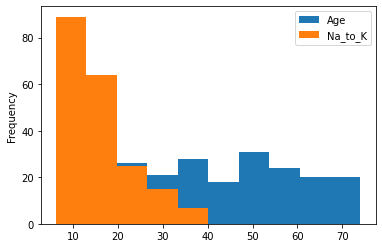

In [ ]:
#histogram
data.plot.hist()

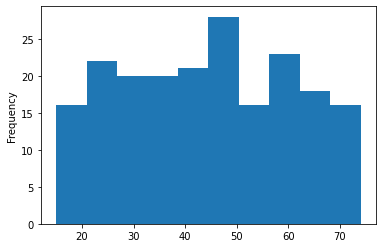

In [ ]:
data.Age.plot.hist()

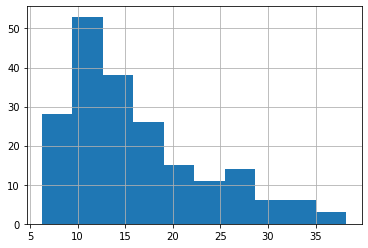

In [ ]:
data.Na_to_K.hist()

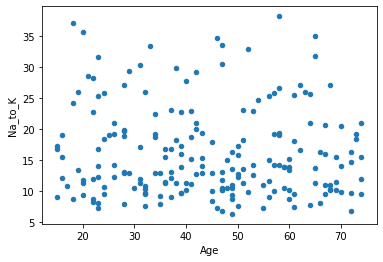

In [ ]:
#scatter plot
data.plot.scatter(x='Age',y='Na_to_K')